In [159]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [160]:
BATCH_SIZE = 32
IMAGE_SIZE = 255
CHANNEL = 3
EPOCHS = 20

In [161]:
# dataset = tf.keras.preprocessing.image_dataset_from_directory(
# directory='C:\Users\santh\dharshika\Potato',
# seed=123,
# shuffle = True,
# image_size=(IMAGE_SIZE,IMAGE_SIZE),
# batch_size = BATCH_SIZE
# )

In [162]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory='C:\\Users\\santh\\dharshika\\all\\PlantVillage',
        seed=123,
        shuffle=True,
        image_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE
    )

Found 2230 files belonging to 5 classes.


In [163]:
len(dataset)

70

In [164]:
class_names = dataset.class_names
class_names

['Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Late_blight',
 'Tomato___healthy']

In [165]:
for image_batch,label_batch in dataset.take(1):
    print("Image Batch Shape : ", image_batch.shape)
    print("Single Image : ", image_batch[0])
    print("Label Image numpy : ", label_batch.numpy)

Image Batch Shape :  (32, 255, 255, 3)
Single Image :  tf.Tensor(
[[[188.95883  172.95883  182.95883 ]
  [172.03337  156.03337  166.03337 ]
  [177.0471   161.0471   171.0471  ]
  ...
  [183.99803  167.99803  177.99803 ]
  [183.99803  167.99803  177.99803 ]
  [183.99803  167.99803  177.99803 ]]

 [[184.95497  168.95497  178.95497 ]
  [174.05898  158.05898  168.05898 ]
  [181.09995  165.09995  175.09995 ]
  ...
  [182.99411  166.99411  176.99411 ]
  [182.99411  166.99411  176.99411 ]
  [182.99411  166.99411  176.99411 ]]

 [[180.9629   164.9629   174.9629  ]
  [177.11362  161.11362  171.11362 ]
  [188.07845  172.07845  182.07845 ]
  ...
  [182.02942  166.02942  176.02942 ]
  [182.02942  166.02942  176.02942 ]
  [182.02942  166.02942  176.02942 ]]

 ...

 [[144.00786  123.007866 132.00786 ]
  [147.9862   126.986206 135.9862  ]
  [144.04903  123.04902  132.04903 ]
  ...
  [175.       159.       169.      ]
  [175.       159.       169.      ]
  [175.       159.       169.      ]]

 [[144.0

In [166]:
len(class_names)

5

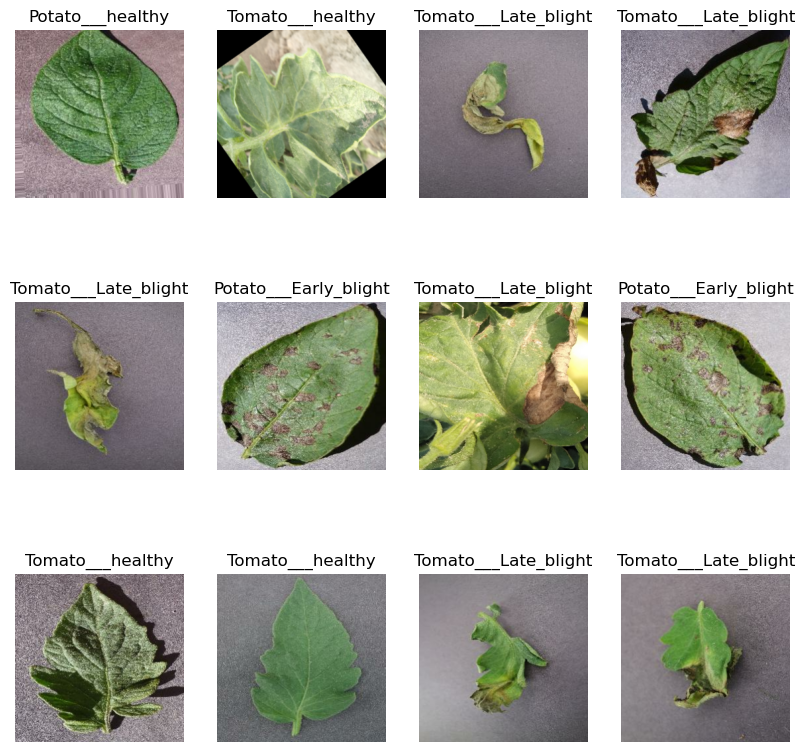

In [167]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    # Code to process the first batch of images and labels
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [168]:
len(dataset)

70

In [169]:
train_size = 0.8
len(dataset) * train_size

56.0

In [170]:
train_ds = dataset.take(56)
len(train_ds)

56

In [171]:
test_ds = dataset.skip(56)
len(test_ds)

14

In [172]:
val_size = 0.1
len(dataset) * val_size

7.0

In [173]:
test_ds = test_ds.skip(7)
len(test_ds)

7

In [174]:
val_ds = test_ds.take(7)
len(val_ds)

7

In [175]:

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [176]:
len(train_ds)

56

In [177]:
len(val_ds)

7

In [178]:
len(test_ds)

7

In [179]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [180]:
#changed

import tensorflow as tf
from tensorflow.keras import layers

IMAGE_SIZE = 224  # Define your image size

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),  # Resize the images
    layers.Rescaling(1./255),  # Normalize the images
])

# Example of how to use it in a model
model = tf.keras.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])


In [181]:
#resize_and_rescale = tf.keras.Sequential([
#  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
#  layers.experimental.preprocessing.Rescaling(1./255),
#])

In [182]:
#changed

import tensorflow as tf
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),  # Flip images randomly
    layers.RandomRotation(0.2),  # Rotate images randomly by up to 20%
])


In [183]:
#data_augmentation = tf.keras.Sequential([
#  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
#  layers.experimental.preprocessing.RandomRotation(0.2),
#])

In [184]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [185]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 255, 255, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [186]:
#changed

import tensorflow as tf
from tensorflow.keras import layers, models

IMAGE_SIZE = 224  # Replace with your image size
CHANNEL = 3  # Typically 3 for RGB images
BATCH_SIZE = 32  # Or any batch size you want
n_classes = 5  # Number of classes

# Your resize and rescale layer (already defined earlier)
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])

# Build the model with Input layer at the beginning
model = models.Sequential([
    layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNEL)),  # Define input shape here
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

# No need to call model.build() explicitly


In [187]:

# input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNEL)
# n_classes = 3

# model = models.Sequential([
#     resize_and_rescale,
#     layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(n_classes, activation='softmax'),
# ])

# model.build(input_shape=input_shape)

In [188]:
model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_23 (Sequential)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,589 (670.27 KB)

 Trainable params: 171,589 (670.27 KB)

 Non-trainable params: 0 (0.00 B)

In [189]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [190]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20,
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.2832 - loss: 1.5427 - val_accuracy: 0.3839 - val_loss: 1.4803
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.3579 - loss: 1.4740 - val_accuracy: 0.3973 - val_loss: 1.4107
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 54s 956ms/step - accuracy: 0.4000 - loss: 1.3728 - val_accuracy: 0.4911 - val_loss: 1.2066
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 51s 915ms/step - accuracy: 0.5402 - loss: 1.1053 - val_accuracy: 0.5134 - val_loss: 1.1099
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 52s 904ms/step - accuracy: 0.5517 - loss: 1.0479 - val_accuracy: 0.6473 - val_loss: 0.8433
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.6759 - loss: 0.8389 - val_accuracy: 0.6429 - val_loss: 0.8290
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.6674 - loss: 0.8166 - val_accuracy: 0.7054 - val_loss: 0.6978
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 56s 999ms/step - accuracy: 0.7462 - loss: 0.6497 - val_accuracy: 0.7321

In [191]:
scores = model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 308ms/step - accuracy: 0.9041 - loss: 0.2370


In [192]:
model.save("model.h5")

In [193]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.523324728012085,
 1.4407055377960205,
 1.3240301609039307,
 1.1344149112701416,
 0.9815179109573364]

In [194]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

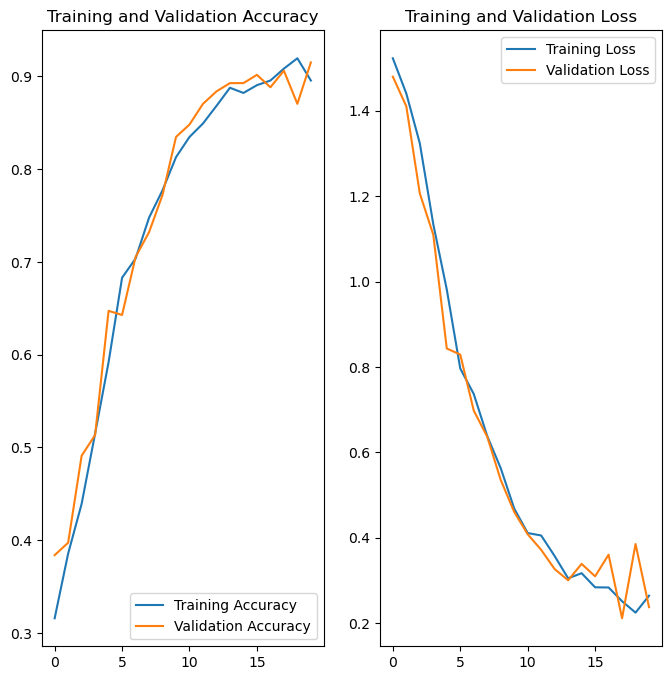

In [195]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [196]:
model = tf.keras.models.load_model('model.h5')

Tomato___Late_blight


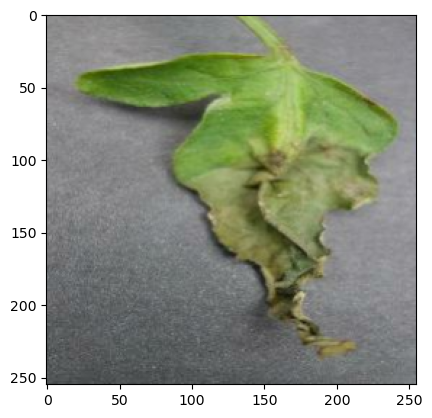

In [197]:
#healthy

import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    # pred_img = model.predict(image_batch) 

    plt.imshow(first_image)
    print(class_names[first_label])
    


    # print("first image to predict")
    # plt.imshow(first_image)
    # print("actual label:",class_names[first_label])

    # batch_prediction = model.predict(images_batch)
    # print("predicted label:",class_names[np.argmax(batch_prediction[0])])

first image to predict
actual label: Tomato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step
predicted label: Tomato___Late_blight


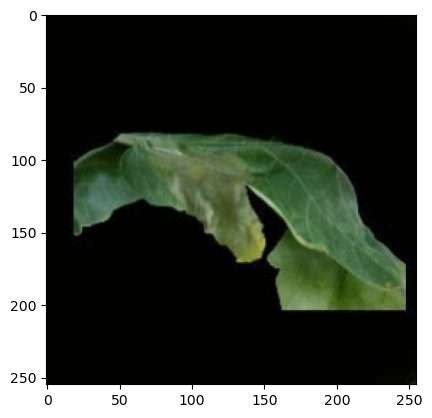

In [198]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [199]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


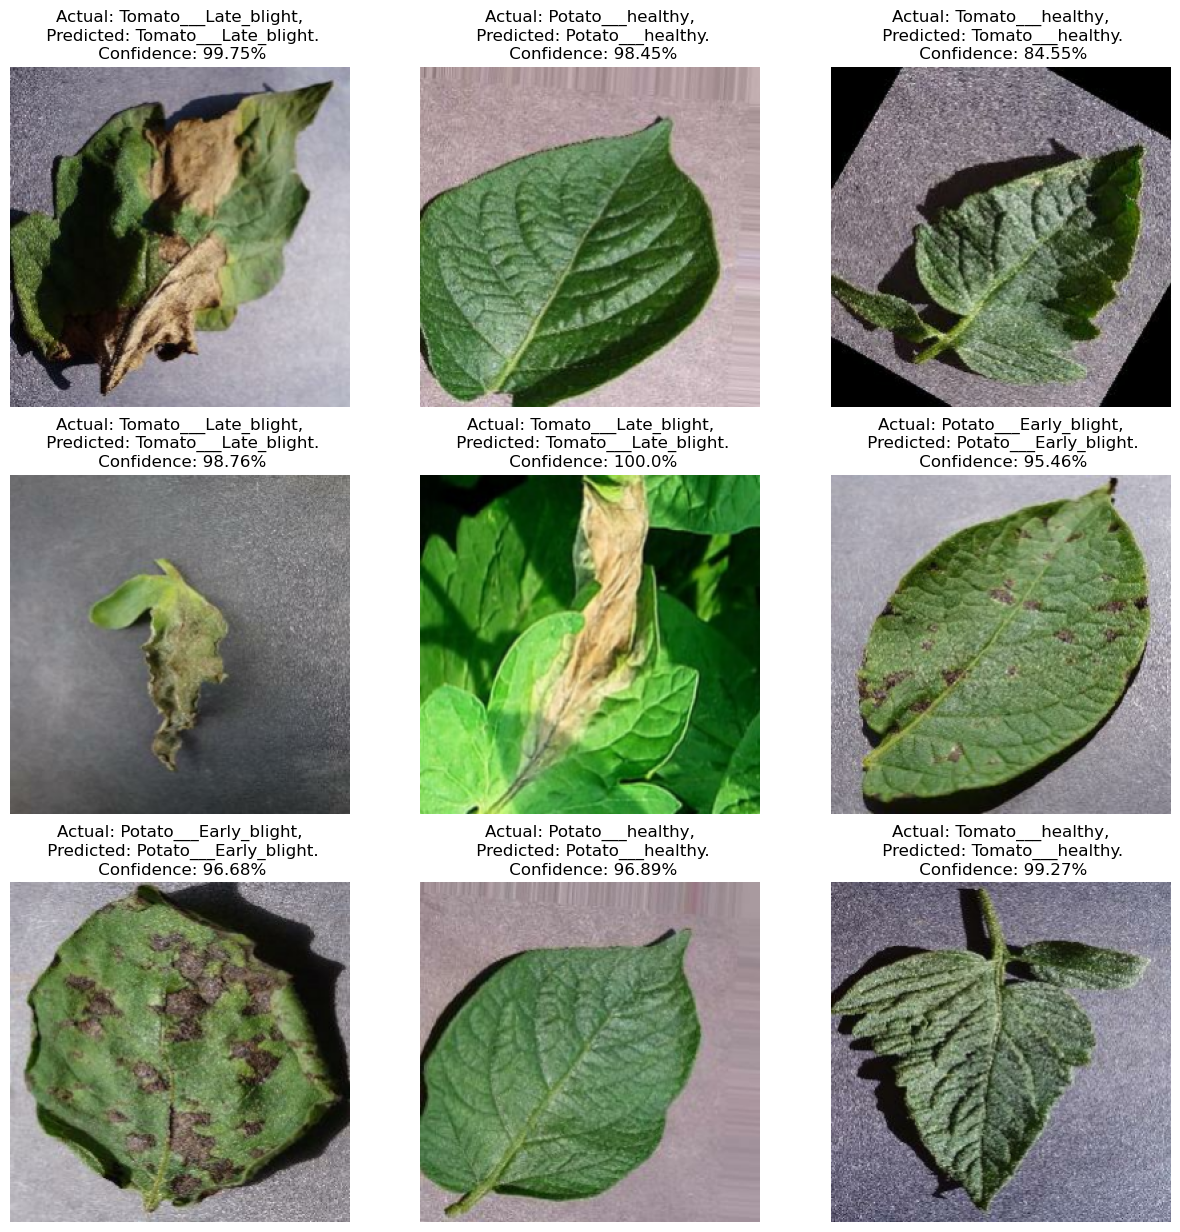

In [200]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")